<a href="https://colab.research.google.com/github/gpk2000/d2l-practice-notebooks/blob/master/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==0.14.3 --quiet
!pip install -U mxnet-cu101mkl==1.6.0.post0 --quiet

In [ ]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
import matplotlib.pyplot as plt
npx.set_np()

In [ ]:
def synthetic_data(w, b, num_examples):     #@save
    """generate y = Xw + b + noise"""
    X = np.random.normal(0, 1, (num_examples, len(w)))      # num_examples x len(w)
    y = np.dot(X, w) + b                                    # num_examples x 1
    y += np.random.normal(0, 0.01, y.shape)             
    return X, y.reshape((-1, 1))

In [ ]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0], '\nlabels:', labels[0])

features: [0.72455114 0.13263007] 
labels: [5.193183]


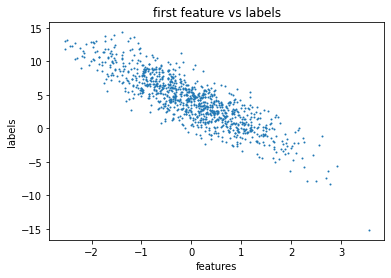

In [ ]:
plt.scatter(features[:,1], labels, 1)
plt.xlabel('features')
plt.ylabel('labels')
plt.title('first feature vs labels')
plt.show()

In [ ]:
def data_iter(batch_size, features, labels):    #@save
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(num_examples, i + batch_size)]
        )
        yield features[batch_indices], labels[batch_indices]

In [ ]:
w = np.random.normal(loc=0, scale=0.01, size=(2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

In [ ]:
def linreg(X, w, b):    #@save
    """the linear regression model"""
    return np.dot(X, w) + b

In [ ]:
def squared_loss(y_hat, y):     #@save
    """Squared loss"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):    #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [ ]:
lr = 0.03
batch_size = 10 
num_epochs = 3
net = linreg
loss = squared_loss

In [ ]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042112
epoch 2, loss 0.000161
epoch 3, loss 0.000049
